In [8]:
import numpy as np

arr1 = np.random.rand(20)
arr2 = np.random.rand(20)

res1 = np.c_[arr1, arr2]
res2 = np.stack([arr1, arr2]).T
res3 = np.vstack([arr1, arr2]).T
res4 = np.column_stack([arr1, arr2])
res5 = np.concatenate([arr1[:, None], arr2[:, None]], axis=1)

In [9]:
print(np.array_equal(res1, res2))
print(np.array_equal(res2, res3))
print(np.array_equal(res3, res4))
print(np.array_equal(res4, res5))

True
True
True
True


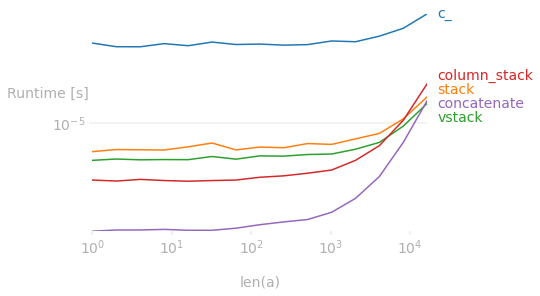

In [10]:
import perfplot

perfplot.show(
    setup=np.random.rand,
    kernels=[
        lambda a: np.c_[a, a],
        lambda a: np.stack([a, a]).T,
        lambda a: np.vstack([a, a]).T,
        lambda a: np.column_stack([a, a]),
        lambda a: np.concatenate([a[:, None], a[:, None]], axis=1),
    ],
    labels=["c_", "stack", "vstack", "column_stack", "concatenate"],
    n_range=[2 ** k for k in range(15)],
    xlabel="len(a)"
)

In [11]:
perfplot.bench(
    setup=np.random.rand,
    kernels=[
        lambda a: np.c_[a, a],
        lambda a: np.stack([a, a]).T,
        lambda a: np.vstack([a, a]).T,
        lambda a: np.column_stack([a, a]),
        lambda a: np.concatenate([a[:, None], a[:, None]], axis=1),
    ],
    labels=["c_", "stack", "vstack", "column_stack", "concatenate"],
    n_range=[2 ** k for k in range(15)],
    xlabel="len(a)"
)

┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ n     ┃ c_                 ┃ stack              ┃ vstack             ┃ column_stack       ┃ concatenate         ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ 1     │ 2.4986e-05         │ 7.123e-06          │ 6.342000000000000… │ 4.889e-06          │ 2.7150000000000003… │
│ 2     │ 2.517700000000000… │ 7.103000000000000… │ 6.412000000000001… │ 4.889e-06          │ 2.745e-06           │
│ 4     │ 2.5187e-05         │ 7.163000000000001… │ 6.312000000000001… │ 4.969e-06          │ 2.746e-06           │
│ 8     │ 2.4926e-05         │ 7.174e-06          │ 6.322000000000001… │ 4.939000000000000… │ 2.725e-06           │
│ 16    │ 2.488600000000000… │ 7.183000000000000… │ 6.412000000000001… │ 4.939000000000000… │ 2.725e-06           │
│ 32    │ 2.4836e-05         │ 7.183000000000000… │ 6.402000000000001… │ 4.949e-06          │ 2.735e-06           │
│ 64    │ 2.5527e-05         │ 7.333000000000001… │ 6.412000000000001… │ 5.049e-06          │ 2.7950000000000003… │
│ 128   │ 2.5718e-05         │ 7.484000000000001… │ 6.642e-06          │ 5.13e-06           │ 2.905e-06           │
│ 256   │ 2.5337e-05         │ 7.514e-06          │ 6.602000000000000… │ 5.259e-06          │ 2.945e-06           │
│ 512   │ 2.5698e-05         │ 7.554000000000001… │ 6.722e-06          │ 5.330000000000001… │ 3.1160000000000003… │
│ 1024  │ 2.5879e-05         │ 7.685e-06          │ 6.903000000000001… │ 5.63e-06           │ 3.3760000000000004… │
│ 2048  │ 2.6639e-05         │ 8.035e-06          │ 7.203e-06          │ 6.272e-06          │ 4.027000000000001e… │
│ 4096  │ 2.789200000000000… │ 8.676000000000001… │ 7.895e-06          │ 7.454e-06          │ 5.230000000000001e… │
│ 8192  │ 3.079700000000000… │ 1.0489e-05         │ 9.487e-06          │ 1.0149e-05         │ 7.885e-06           │
│ 16384 │ 3.6899e-05         │ 1.3695e-05         │ 1.267400000000000… │ 1.5639e-05         │ 1.3405000000000001… │
└───────┴────────────────────┴────────────────────┴────────────────────┴────────────────────┴─────────────────────┘

In [14]:
import functools
import operator

myvalues = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

flat_list1 = [x for sublist in myvalues for x in sublist]
flat_list2 = functools.reduce(operator.concat, myvalues)

In [39]:
def list_comp(values):
    return [x for sublist in values for x in sublist]

def reduce_method(values):
    return functools.reduce(operator.concat, values)

def sum_method(values):
    return sum(values, [])

def numpy_flat(values):
    return list(np.array(values).flat)

def numpy_concat(values):
    return list(np.concatenate(values))

def nested_loops(values):
    result = []
    for sublist in values:
        for x in sublist:
            result.append(x)
    return result

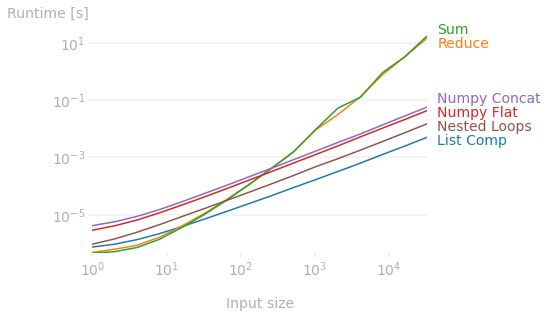

In [40]:
perfplot.show(
    setup=lambda n: [list(range(10))] * n,
    kernels=[
        list_comp,
        reduce_method,
        sum_method,
        numpy_flat,
        numpy_concat,
        nested_loops
    ],
    n_range=[2 ** k for k in range(16)],
    labels=["List Comp", "Reduce", "Sum", "Numpy Flat", "Numpy Concat", "Nested Loops"],
    xlabel="Input size"
)